In [54]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [55]:
pip install seaborn


Note: you may need to restart the kernel to use updated packages.


In [56]:
#Abrir librerias a utilizar
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [57]:
# Configuración general para lectura y limpieza
CFG = {
    "path": "C:/Users/bruno/Desktop/PROYECTO ULTIMO/EndInvFINAL12312016.csv",   # ruta a tu archivo
    "sep": ",",                     # separador CSV
    "encoding": "utf-8",
    "na_like": ["", "NA", "N/A", "-", "null", "None"]}

In [58]:
#importar archivo y configuro el archivo 
final_de_inventario="C:/Users/bruno/Desktop/PROYECTO ULTIMO/EndInvFINAL12312016.csv", #ruta del archivo
                  
                    

In [59]:

#aplico la configuracion a mi archivo
df_final_de_inventario=pd.read_csv(
                         CFG["path"],
                         sep=CFG["sep"],
                         encoding=CFG["encoding"],
                         na_values=CFG["na_like"]
) #leer archivo

In [60]:
df_final_de_inventario.shape#analizar la cantidad de filas y columnas

(224489, 9)

In [61]:
# Muestra información general de columnas, tipos de datos y nulos
df_final_de_inventario.info() 

# Vista rápida de las primeras filas
df_final_de_inventario.head() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224489 entries, 0 to 224488
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  224489 non-null  object 
 1   Store        224489 non-null  int64  
 2   City         223205 non-null  object 
 3   Brand        224489 non-null  int64  
 4   Description  224489 non-null  object 
 5   Size         224489 non-null  object 
 6   onHand       224489 non-null  int64  
 7   Price        224489 non-null  float64
 8   endDate      224489 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 15.4+ MB


,InventoryId,Store,City,Brand,Description,Size,onHand,Price,endDate
0,1_HARDERSFIELD_58,1,HARDERSFIELD,58,Gekkeikan Black & Gold Sake,750mL,11,12.99,2016-12-31
1,1_HARDERSFIELD_62,1,HARDERSFIELD,62,Herradura Silver Tequila,750mL,7,36.99,2016-12-31
2,1_HARDERSFIELD_63,1,HARDERSFIELD,63,Herradura Reposado Tequila,750mL,7,38.99,2016-12-31
3,1_HARDERSFIELD_72,1,HARDERSFIELD,72,No. 3 London Dry Gin,750mL,4,34.99,2016-12-31
4,1_HARDERSFIELD_75,1,HARDERSFIELD,75,Three Olives Tomato Vodka,750mL,7,14.99,2016-12-31


In [62]:
# Estadísticas numéricas básicas; solo muestras las columnas numericas
df_final_de_inventario.describe()

,Store,Brand,onHand,Price
count,224489.000000,224489.000000,224489.000000,224489.000000
mean,43.505740,14356.370513,21.763988,23.585583
std,23.326415,13118.467851,37.233576,79.202775
min,1.000000,58.000000,0.000000,0.490000
25%,23.000000,3798.000000,7.000000,9.990000
50%,44.000000,8259.000000,12.000000,14.990000
75%,66.000000,23965.000000,22.000000,23.490000
max,81.000000,90631.000000,3676.000000,13999.900000


In [63]:
# Conteo de valores nulos por columna
df_final_de_inventario.isna().sum()

InventoryId       0
Store             0
City           1284
Brand             0
Description       0
Size              0
onHand            0
Price             0
endDate           0
dtype: int64

In [64]:
#realizar copia 
df_final_de_inventario2=df_final_de_inventario.copy()

In [65]:
#eliminar datos nulos 
df_final_de_inventario2 = df_final_de_inventario2.dropna(subset=["City"], how="all")


In [15]:
df_final_de_inventario2.isna().sum() #VERIFICO DATOS NUELOS.

InventoryId    0
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
endDate        0
dtype: int64

In [66]:
df_final_de_inventario2.info() #Se corrobora que las filas tiene la misma cantidad de registros

<class 'pandas.core.frame.DataFrame'>
Index: 223205 entries, 0 to 224488
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InventoryId  223205 non-null  object 
 1   Store        223205 non-null  int64  
 2   City         223205 non-null  object 
 3   Brand        223205 non-null  int64  
 4   Description  223205 non-null  object 
 5   Size         223205 non-null  object 
 6   onHand       223205 non-null  int64  
 7   Price        223205 non-null  float64
 8   endDate      223205 non-null  object 
dtypes: float64(1), int64(3), object(5)
memory usage: 17.0+ MB


In [67]:
print(df_final_de_inventario2.columns.tolist())

['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'endDate']


In [68]:
# 2️⃣ Renombrar todas las columnas a formato snake_case
df_final_de_inventario2.columns = (
    df_final_de_inventario2.columns
      .str.strip()                                     # elimina espacios al principio/fin
      .str.lower()                                    # convierte a minúsculas
      .str.normalize('NFKD')                          # quita tildes
      .str.encode('ascii', errors='ignore')           # quita caracteres especiales
      .str.decode('utf-8')
      .str.replace(r'\s+', '_', regex=True)           # reemplaza espacios por "_"
      .str.replace(r'[^a-z0-9_]', '', regex=True)     # elimina caracteres raros
)
# 3️⃣ Convertir columnas de texto a string (más seguro que object)
cols_texto = ["inventoryid", "city","description","size"]
for col in cols_texto:
    if col in df_final_de_inventario2.columns:
        df_final_de_inventario2[col] = df_final_de_inventario2[col].astype("string").str.strip()

# 4️⃣ Convertir esas columnas al tipo datetime (día/mes/año)
df_final_de_inventario2["enddate"]= pd.to_datetime(df_final_de_inventario2["enddate"], errors='coerce', dayfirst=True)

# 5️⃣ (Opcional) Mostrar resultados
print("✅ Columnas convertidas a snake_case:")
print(df_final_de_inventario2.columns.to_list())

print("\n✅ Columnas de fecha convertidas al formato datetime:")
print(df_final_de_inventario2["enddate"].head())




✅ Columnas convertidas a snake_case:
['inventoryid', 'store', 'city', 'brand', 'description', 'size', 'onhand', 'price', 'enddate']

✅ Columnas de fecha convertidas al formato datetime:
0   2016-12-31
1   2016-12-31
2   2016-12-31
3   2016-12-31
4   2016-12-31
Name: enddate, dtype: datetime64[ns]


C:\Users\bruno\AppData\Local\Temp\ipykernel_4100\1605461279.py:19: UserWarning: Parsing dates in %Y-%m-%d format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df_final_de_inventario2["enddate"]= pd.to_datetime(df_final_de_inventario2["enddate"], errors='coerce', dayfirst=True)


In [94]:
for col in df_final_de_inventario2.select_dtypes(include="object").columns:
    df_final_de_inventario2[col] = (df_final_de_inventario2[col]
                 .str.strip()                        # quitar espacios extremos
                 .str.upper()                        # pasar a mayusculas
                 .str.replace(r"\s+", " ", regex=True))  # normalizar espacios internos

In [95]:
df_final_de_inventario2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 223205 entries, 0 to 224488
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   inventoryid  223205 non-null  string        
 1   store        223205 non-null  int64         
 2   city         223205 non-null  string        
 3   brand        223205 non-null  int64         
 4   description  223205 non-null  string        
 5   size         223205 non-null  string        
 6   onhand       223205 non-null  int64         
 7   price        223205 non-null  float64       
 8   enddate      223205 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), string(4)
memory usage: 17.0 MB


In [71]:
import re

# Crear copia del DataFrame original
df_correccion_militros = df_final_de_inventario2.copy()


def correccion_mililitros(valor):
    if pd.isna(valor):
        return np.nan

    v = str(valor).lower().replace(',', '.').strip()

    # Extraer primer número (si existe)
    m = re.search(r'\d+(?:\.\d+)?', v)
    num = float(m.group()) if m else np.nan

    # Litros: si hay número => num*1000; si no hay => 1000 fijo
    if re.search(r'(?:\blitro?s?\b|\bliters?\b|\blt\b)', v) or re.search(r'(?<!m)(?<!c)l\.?$', v):
        return 1000.0 if np.isnan(num) else round(num * 1000, 2)

    # Otras unidades
    if any(u in v for u in ['ml', 'mililitro', 'mililitros', 'cc']):
        factor = 1.0
    elif 'cl' in v:
        factor = 10.0
    elif any(u in v for u in ['oz', 'onza', 'ounce', 'ounces']):
        factor = 29.5735
    else:
        factor = 1.0  # sin unidad conocida, dejamos el número tal cual

    return np.nan if np.isnan(num) else round(num * factor, 2)


# Aplicar la función
df_correccion_militros["size_original"] = df_correccion_militros["size"]
df_correccion_militros["size"] = df_correccion_militros["size_original"].apply(correccion_mililitros)

# Forzar tipo numérico
df_correccion_militros["size"] = pd.to_numeric(df_correccion_militros["size"], errors="coerce")

print("✅ Columna 'size' convertida correctamente a mililitros:")
print(df_correccion_militros[["size_original", "size"]].head(50))


✅ Columna 'size' convertida correctamente a mililitros:
   size_original    size
0          750mL   750.0
1          750mL   750.0
2          750mL   750.0
3          750mL   750.0
4          750mL   750.0
5          750mL   750.0
6          750mL   750.0
7          Liter  1000.0
8          Liter  1000.0
9     750mL + 2/   750.0
10         1.75L  1750.0
11         750mL   750.0
12         750mL   750.0
13         750mL   750.0
14         750mL   750.0
15         750mL   750.0
16         750mL   750.0
17         Liter  1000.0
18         Liter  1000.0
19         750mL   750.0
20         1.75L  1750.0
21         750mL   750.0
22         750mL   750.0
23         750mL   750.0
24         Liter  1000.0
25         Liter  1000.0
26         750mL   750.0
27         750mL   750.0
28         750mL   750.0
29         750mL   750.0
30         Liter  1000.0
31         750mL   750.0
32         750mL   750.0
33         Liter  1000.0
34         750mL   750.0
35         Liter  1000.0
36         Liter  1

In [73]:
# Crear nueva columna en el DataFrame original
df_correccion_militros["size_ml"] = df_correccion_militros["size_original"].apply(correccion_mililitros)

# Asegurarte de que el tipo sea numérico
df_correccion_militros["size_ml"] = pd.to_numeric(df_correccion_militros["size_ml"], errors="coerce")


print(" Columna 'size_ml' agregada correctamente al DataFrame:")
print(df_correccion_militros[["size", "size_ml"]].head(10))


 Columna 'size_ml' agregada correctamente al DataFrame:
     size  size_ml
0   750.0    750.0
1   750.0    750.0
2   750.0    750.0
3   750.0    750.0
4   750.0    750.0
5   750.0    750.0
6   750.0    750.0
7  1000.0   1000.0
8  1000.0   1000.0
9   750.0    750.0


In [79]:
# Eliminar la columna original
df_correccion_militros.drop(columns=["size_original"], inplace=True)

In [80]:
print(df_correccion_militros.columns)

Index(['inventoryid', 'store', 'city', 'brand', 'description', 'onhand',
       'price', 'enddate', 'size_ml'],
      dtype='object')


In [81]:
#Eliminar filas repetidas
print (f"Tamaño del set antes de eliminar las filas repetidas: {df_correccion_militros.shape}")
df_correccion_militros.drop_duplicates(inplace=True)
print(f"Tamañño del set despues de elimminar las filas repetidas: {df_correccion_militros.shape}")

Tamaño del set antes de eliminar las filas repetidas: (223205, 9)
Tamañño del set despues de elimminar las filas repetidas: (223205, 9)


In [83]:
def limpiar_decimales(columna):
    s = columna.astype(str).str.strip()

    # Quitar todo excepto números, comas, puntos y signo
    s = s.str.replace(r'[^0-9,.\-]', '', regex=True)

    # Reemplazar comas por puntos
    s = s.str.replace(',', '.', regex=False)

    # Extraer los primeros 4 dígitos numéricos
    s = s.apply(lambda x: re.search(r'\d{1,4}', x).group() if re.search(r'\d{1,4}', x) else np.nan)

    # Convertir a número
    s = pd.to_numeric(s, errors='coerce')

    return s

In [84]:
df_correccion_militros['price'] = limpiar_decimales(df_correccion_militros['price'])
df_correccion_militros['onhand'] = limpiar_decimales(df_correccion_militros['onhand'])
df_correccion_militros['brand'] = limpiar_decimales(df_correccion_militros['brand'])


In [85]:
df_correccion_militros["price"]

0          12
1          36
2          38
3          34
4          14
         ... 
224484    469
224485    134
224486    119
224487    649
224488    119
Name: price, Length: 223205, dtype: int64

In [86]:
df_correccion_militros[['price', 'onhand', 'brand']].head()
print(df_correccion_militros.dtypes)


inventoryid    string[python]
store                   int64
city           string[python]
brand                   int64
description    string[python]
onhand                  int64
price                   int64
enddate        datetime64[ns]
size_ml               float64
dtype: object


In [87]:
df_correccion_militros.describe()

,store,brand,onhand,price,enddate,size_ml
count,223205.000000,223205.000000,223205.000000,223205.000000,223205,223205.000000
mean,43.491391,3676.029390,21.889187,22.591801,2016-12-31 00:00:00,905.589149
min,1.000000,58.000000,0.000000,0.000000,2016-12-31 00:00:00,3.000000
25%,23.000000,2138.000000,7.000000,9.000000,2016-12-31 00:00:00,750.000000
50%,44.000000,3265.000000,12.000000,14.000000,2016-12-31 00:00:00,750.000000
75%,66.000000,4549.000000,22.000000,23.000000,2016-12-31 00:00:00,750.000000
max,81.000000,9823.000000,3676.000000,7499.000000,2016-12-31 00:00:00,128000.000000
std,23.392643,2097.038452,37.303803,73.760814,NaN,658.704115


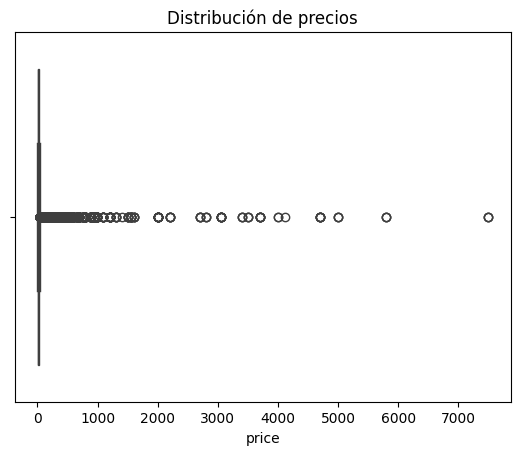

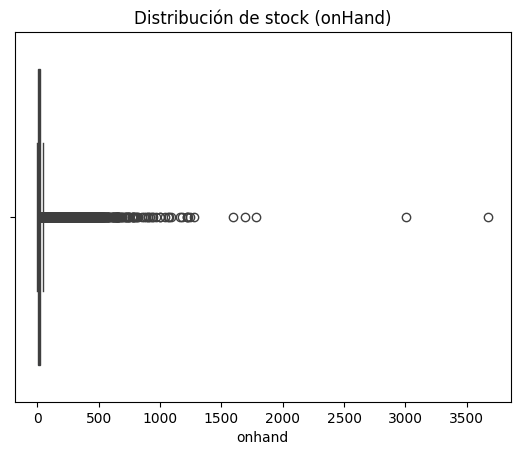

In [88]:
#Realizar grafico para ver valores extremos

sns.boxplot(x=df_correccion_militros['price'])
plt.title('Distribución de precios')
plt.show()

sns.boxplot(x=df_correccion_militros['onhand'])
plt.title('Distribución de stock (onHand)')
plt.show()


In [89]:
Q1 = df_correccion_militros['price'].quantile(0.25)
Q3 = df_correccion_militros['price'].quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

df_winsor = df_correccion_militros.copy()
df_winsor['price'] = np.where(
    df_winsor['price'] > lim_sup, lim_sup,
    np.where(df_winsor['price'] < lim_inf, lim_inf, df_winsor['price']))

print(f"Filas originales: {len(df_final_de_inventario2)}")
print(f"Filas después del filtrado: {len(df_winsor)}")
print(f"Límites usados: {lim_inf:.2f} a {lim_sup:.2f}")


Filas originales: 223205
Filas después del filtrado: 223205
Límites usados: -12.00 a 44.00


In [90]:
Q1 = df_correccion_militros['onhand'].quantile(0.25)
Q3 = df_correccion_militros['onhand'].quantile(0.75)
IQR = Q3 - Q1
lim_inf = Q1 - 1.5 * IQR
lim_sup = Q3 + 1.5 * IQR

df_winsor['onhand'] = np.where(
    df_winsor['onhand'] > lim_sup, lim_sup,
    np.where(df_winsor['onhand'] < lim_inf, lim_inf, df_winsor['onhand']))

print(f"Filas originales: {len(df_final_de_inventario2)}")
print(f"Filas después del filtrado: {len(df_winsor)}")
print(f"Límites usados: {lim_inf:.2f} a {lim_sup:.2f}")

Filas originales: 223205
Filas después del filtrado: 223205
Límites usados: -15.50 a 44.50


In [91]:
print("\n📊 Estadísticas ANTES:")
print(df_final_de_inventario2[["price","onhand"]].describe())

print("\n📊 Estadísticas DESPUÉS (winsorizado):")
print(df_winsor[["price", "onhand"]].describe())


📊 Estadísticas ANTES:
               price         onhand
count  223205.000000  223205.000000
mean       23.616610      21.889187
std        79.422296      37.303803
min         0.490000       0.000000
25%         9.990000       7.000000
50%        14.990000      12.000000
75%        23.990000      22.000000
max     13999.900000    3676.000000

📊 Estadísticas DESPUÉS (winsorizado):
               price         onhand
count  223205.000000  223205.000000
mean       17.487507      16.451280
std        11.910074      13.153494
min         0.000000       0.000000
25%         9.000000       7.000000
50%        14.000000      12.000000
75%        23.000000      22.000000
max        44.000000      44.500000


In [97]:
# Exportar el DataFrame limpio (sin índices)
df_winsor.to_csv("datos_limpios.csv", index=False,sep=",", encoding='utf-8')

print("✅ Archivo 'datos_limpios.csv' guardado correctamente en la carpeta del proyecto.")

✅ Archivo 'datos_limpios.csv' guardado correctamente en la carpeta del proyecto.
